<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E11-PatentCitationNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJO EN GRUPO - TÓPICOS AVANZADOS DE ANALÍTICA**

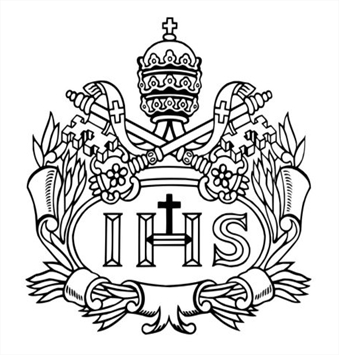

Sonia Ramírez

Anguie García

Mili Galindo

Lourdes Rodill

# Patent Citation Network

U.S. patent dataset is maintained by the [National Bureau of Economic Research](http://www.nber.org/). The data set spans 37 years (January 1, 1963 to December 30, 1999), and includes all the utility patents granted during that period, totaling 3,923,922 patents. The citation graph includes all citations made by patents granted between 1975 and 1999, totaling 16,522,438 citations. For the patents dataset there are 1,803,511 nodes for which we have no information about their citations (we only have the in-links).

The data was originally released by [NBER](http://www.nber.org/patents/). The dataset can be found at this link: [Stanford Patent Citation Network](https://snap.stanford.edu/data/cit-Patents.html)

## Import Packages

In [100]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Import data

In [101]:
patent = pd.read_csv(
    "http://snap.stanford.edu/data/cit-Patents.txt.gz",
    compression="gzip",
    sep="\t",
    names=["start_node", "end_node"],
    skiprows=5
)

In [102]:
patent.head()

,start_node,end_node
0,3858241,1324234
1,3858241,3398406
2,3858241,3557384
3,3858241,3634889
4,3858242,1515701


In [103]:
patent.shape

(16518947, 2)

Se observa que el dataset "Patent" tiene más de 16 millones de registros.

**Muestra Dataset**

In [104]:
# Ya que el conjunto de datos es muy grande, trabajaremos con una muestra del 0.12%
sample_patent = patent.sample(frac=0.00015, random_state=123)

In [105]:
sample_patent.shape

(2478, 2)

Ahora tenemos un dataset con 3.304 registros.

## Build Recommendation System

build a recommendation system based on Node2Vec with the patent information, remember to do a descriptive analysis and apply visualizations.

Also, remember that when making a recommendation about which patent should be associated with another, make a visualization of the recommendation.

In [106]:
Grafo = nx.DiGraph()
Grafo.add_edges_from(sample_patent.values)

# **Análisis Descriptivo y Visualizaciones**

In [107]:
#Numero de nodos y aristas
num_nodos = Grafo.number_of_nodes()
num_aristas = Grafo.number_of_edges()
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")

Número de nodos: 4951
Número de aristas: 2478


In [108]:
# Grado de los Nodos
grados = dict(Grafo.degree())
print(f"Grado de los nodos: {grados}")

Grado de los nodos: {4159373: 1, 3766176: 1, 5760604: 1, 5208491: 1, 4756572: 1, 3637184: 1, 5482249: 1, 4271866: 1, 3939926: 1, 3526285: 1, 3897758: 1, 879707: 1, 3950821: 1, 3751764: 1, 4817555: 1, 2924192: 1, 4140039: 1, 3544693: 1, 4592590: 1, 2490823: 1, 4309591: 1, 4212631: 1, 5036365: 1, 3287244: 1, 5038774: 1, 4219017: 1, 5888332: 1, 5449425: 1, 5690382: 1, 3802527: 1, 4683831: 1, 2677863: 1, 4047550: 1, 2741287: 1, 4108990: 1, 2867566: 1, 4145105: 1, 2725543: 1, 5887115: 1, 4584613: 1, 5550746: 1, 4071911: 1, 5928999: 1, 4008249: 1, 5729013: 1, 5166747: 1, 4460913: 1, 4322736: 1, 3963532: 1, 3813240: 1, 5952612: 1, 3138657: 1, 4455121: 1, 4151709: 1, 4057727: 1, 3573458: 1, 4271647: 1, 3106227: 1, 5884605: 1, 5752485: 1, 4888494: 1, 4001810: 1, 5807871: 1, 4358456: 1, 3919013: 1, 3369943: 1, 4162857: 1, 3445091: 1, 4149457: 1, 3603247: 1, 5093784: 1, 4484261: 1, 5268377: 1, 4686226: 1, 5980322: 1, 5505633: 1, 5678582: 1, 2652843: 1, 4624352: 1, 2179568: 1, 5074175: 1, 4571808:

In [109]:
# Grado Promedio
grado_promedio = sum(dict(Grafo.degree()).values()) / Grafo.number_of_nodes()
print(f"Grado promedio: {grado_promedio}")

Grado promedio: 1.001009896990507


El grado promedio de los nodos nos muestra que para el dataset analizado, el número promedio de aristas o enlaces que tienen los nodos es 1.

In [110]:
# Centralidad de cercanía
centralidad_cercania = nx.closeness_centrality(Grafo)
print(f"Centralidad de cercanía: {centralidad_cercania}")


Centralidad de cercanía: {4159373: 0.0, 3766176: 0.00020202020202020202, 5760604: 0.0, 5208491: 0.00020202020202020202, 4756572: 0.0, 3637184: 0.00020202020202020202, 5482249: 0.0, 4271866: 0.00020202020202020202, 3939926: 0.0, 3526285: 0.00020202020202020202, 3897758: 0.0, 879707: 0.00020202020202020202, 3950821: 0.0, 3751764: 0.00020202020202020202, 4817555: 0.0, 2924192: 0.00020202020202020202, 4140039: 0.0, 3544693: 0.00020202020202020202, 4592590: 0.0, 2490823: 0.00020202020202020202, 4309591: 0.0, 4212631: 0.00020202020202020202, 5036365: 0.0, 3287244: 0.00020202020202020202, 5038774: 0.0, 4219017: 0.00020202020202020202, 5888332: 0.0, 5449425: 0.00020202020202020202, 5690382: 0.0, 3802527: 0.00020202020202020202, 4683831: 0.0, 2677863: 0.00020202020202020202, 4047550: 0.0, 2741287: 0.00020202020202020202, 4108990: 0.0, 2867566: 0.00020202020202020202, 4145105: 0.0, 2725543: 0.00020202020202020202, 5887115: 0.0, 4584613: 0.00020202020202020202, 5550746: 0.0, 4071911: 0.0002020202

In [111]:
# Coeficiente de asortatividad
coeficiente_asortatividad = nx.degree_assortativity_coefficient(Grafo)
print(f"Coeficiente de asortatividad: {coeficiente_asortatividad}")


Coeficiente de asortatividad: -0.00161681487471634


Un coeficiente de asortatividad negativo nos muestra que no hay una tendencia de los nodos a conectar con otros nodos de grado similar.

In [112]:
# Densidad del grafo
densidad = nx.density(Grafo)
print(f"Densidad del grafo: {densidad}")


Densidad del grafo: 0.00010111211080712192


# **Visualización del grafo**

(-1.20535101801157,
 1.2075742116570474,
 -1.2065843316912652,
 1.2096753689646722)

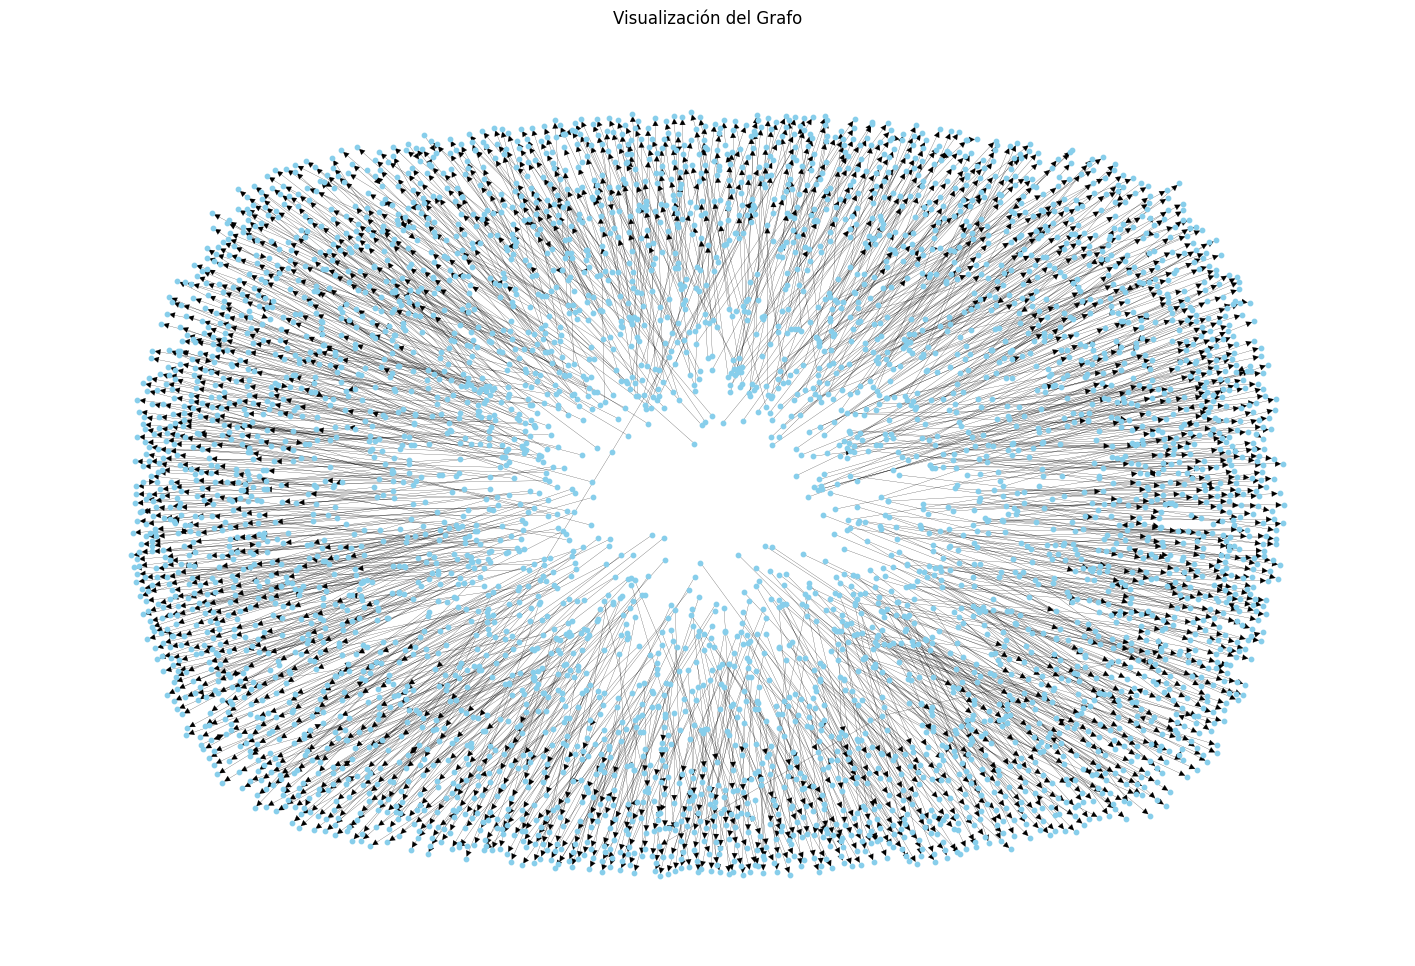

In [113]:
# Dibujar el grafo
plt.figure(figsize = (18, 12))
pos = nx.spring_layout(Grafo, iterations = 15, seed = 1234)
nx.draw_networkx(Grafo,
                 pos,
                 node_size = 10,
                 with_labels = False,
                 node_color='skyblue',
                 edge_color='k',
                 width = 0.15
                 )

# Mostrar la visualización
plt.title("Visualización del Grafo")
plt.axis("off")



In [114]:
#Importamos librería Node2Vec para la generación de los embeddings
!pip install node2vec
from node2vec import Node2Vec

In [115]:
# Representaciones vectoriales nodos
node2vec = Node2Vec(Grafo, dimensions=64, walk_length=20, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/4951 [00:00<?, ?it/s]

# **Recomendaciones**

Ahora vamos a explorar la similitud entre los nodos en el grafo utilizando las representaciones vectoriales aprendidas por Node2Vec.

In [142]:
import random

# Lista de todos los nodos en el Grafo
nodos_grafo = list(Grafo.nodes)

# Seleccionar un nodo aleatorio
random.seed(150)
nodo_1 = random.choice(nodos_grafo)

similar_nodos = model.wv.most_similar(str(nodo_1), topn=15)

print(f"Nodo seleccionado: {nodo_1}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")

Nodo seleccionado: 4067628
Nodos más similares:
  Nodo: 4670888, Similitud: 0.6306276917457581
  Nodo: 4987367, Similitud: 0.6137741208076477
  Nodo: 5855799, Similitud: 0.6128925681114197
  Nodo: 4207367, Similitud: 0.612802267074585
  Nodo: 4535212, Similitud: 0.606237530708313
  Nodo: 4308085, Similitud: 0.5997172594070435
  Nodo: 5428934, Similitud: 0.5921187996864319
  Nodo: 4596510, Similitud: 0.5917865037918091
  Nodo: 3124162, Similitud: 0.5856877565383911
  Nodo: 5814923, Similitud: 0.5853136777877808
  Nodo: 2242891, Similitud: 0.5829476118087769
  Nodo: 5646557, Similitud: 0.581635594367981
  Nodo: 5379912, Similitud: 0.5815985798835754
  Nodo: 4665449, Similitud: 0.5783960223197937
  Nodo: 1225416, Similitud: 0.5782654881477356


# **Visualización del grafo con recomendaciones**

In [122]:
recomendaciones = [int(nodo) for nodo, _ in similar_nodos]
Grafo2 = Grafo.subgraph([nodo_1] + recomendaciones)

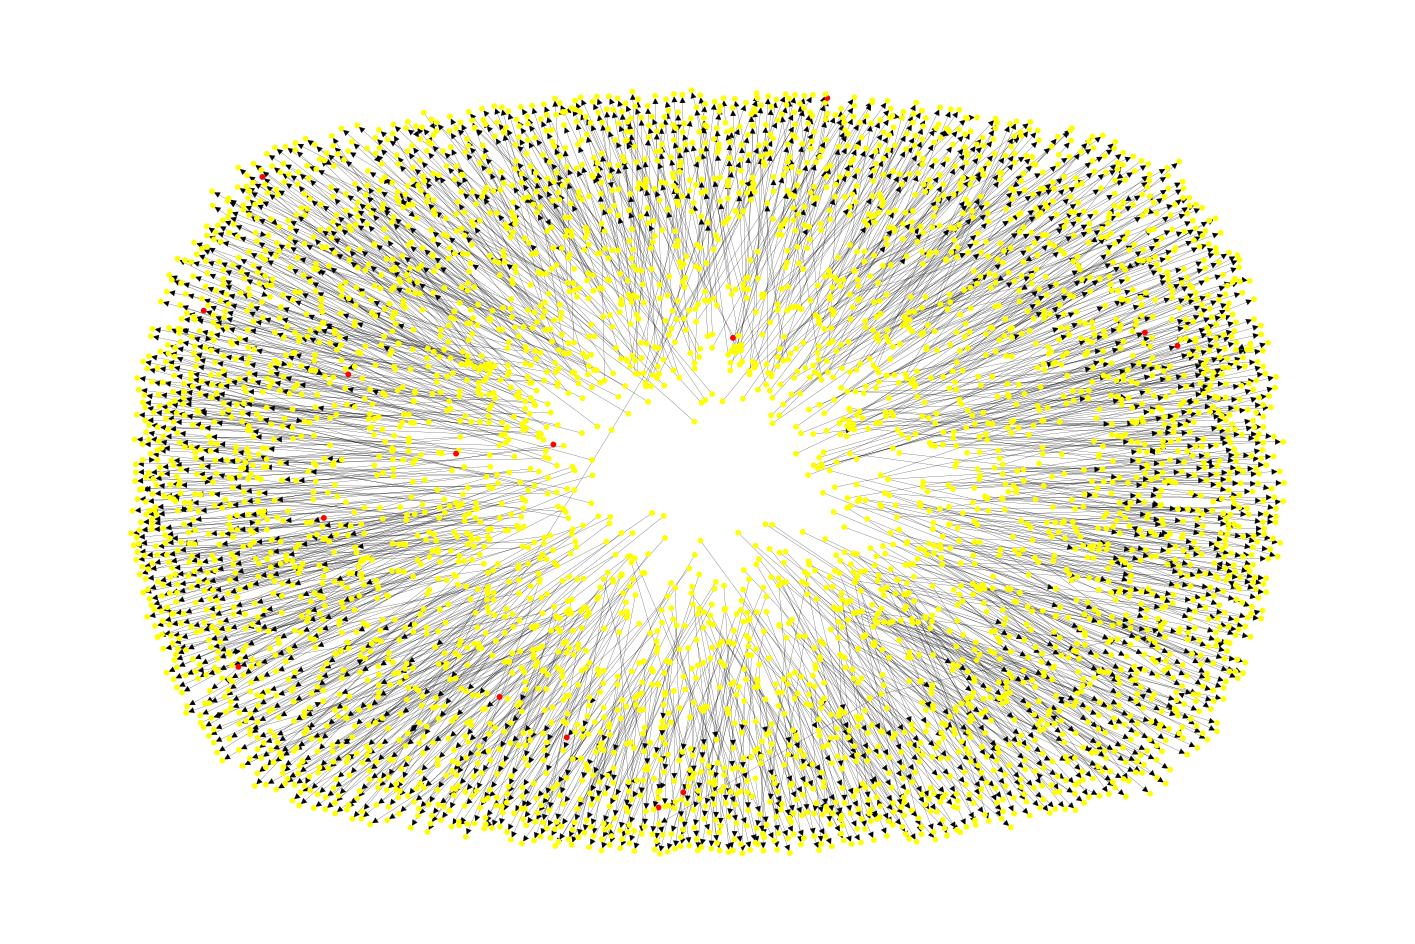

In [125]:
# Visuaización de las recomendaciones
color_map = []
size_map = []
for node in Grafo:
    if nodo == nodo_1:
        color_map.append('blue')
    elif node in [int(sim_node) for sim_node, _ in similar_nodos]:
        color_map.append('red')
        size_map.append(150)
    else:
        color_map.append('yellow')
        size_map.append(10)

plt.figure(figsize=(18, 12))
plt.axis("off")
pos = nx.spring_layout(Grafo, iterations=15, seed=1234)
nx.draw_networkx(Grafo, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=color_map)

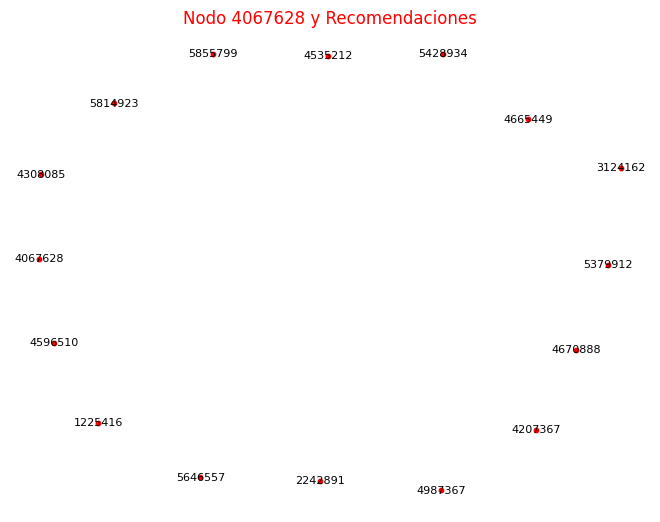

Nodo seleccionado: 4067628
Nodos más similares:
  Nodo: 4670888, Similitud: 0.6306276917457581
  Nodo: 4987367, Similitud: 0.6137741208076477
  Nodo: 5855799, Similitud: 0.6128925681114197
  Nodo: 4207367, Similitud: 0.612802267074585
  Nodo: 4535212, Similitud: 0.606237530708313
  Nodo: 4308085, Similitud: 0.5997172594070435
  Nodo: 5428934, Similitud: 0.5921187996864319
  Nodo: 4596510, Similitud: 0.5917865037918091
  Nodo: 3124162, Similitud: 0.5856877565383911
  Nodo: 5814923, Similitud: 0.5853136777877808
  Nodo: 2242891, Similitud: 0.5829476118087769
  Nodo: 5646557, Similitud: 0.581635594367981
  Nodo: 5379912, Similitud: 0.5815985798835754
  Nodo: 4665449, Similitud: 0.5783960223197937
  Nodo: 1225416, Similitud: 0.5782654881477356


In [139]:
recomendaciones = [int(nodo) for nodo, _ in similar_nodos]
Grafo2 = Grafo.subgraph([nodo_1] + recomendaciones)
pos_Grafo2 = nx.spring_layout(Grafo2)
nx.draw(Grafo2, pos_Grafo2, with_labels=True, font_size=8 ,node_size=10, node_color='r')
plt.title(f"Nodo {nodo_1} y Recomendaciones", color='red')
plt.show()

print(f"Nodo seleccionado: {nodo_1}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")

In [140]:
nodo_2 = random.choice(nodos_grafo)
similar_nodos2 = model.wv.most_similar(str(nodo_2), topn=15)

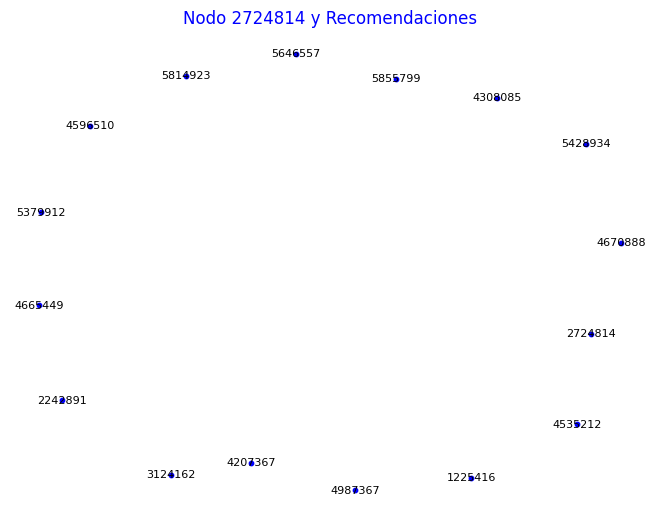

Nodo seleccionado: 2724814
Nodos más similares:
  Nodo: 4670888, Similitud: 0.6306276917457581
  Nodo: 4987367, Similitud: 0.6137741208076477
  Nodo: 5855799, Similitud: 0.6128925681114197
  Nodo: 4207367, Similitud: 0.612802267074585
  Nodo: 4535212, Similitud: 0.606237530708313
  Nodo: 4308085, Similitud: 0.5997172594070435
  Nodo: 5428934, Similitud: 0.5921187996864319
  Nodo: 4596510, Similitud: 0.5917865037918091
  Nodo: 3124162, Similitud: 0.5856877565383911
  Nodo: 5814923, Similitud: 0.5853136777877808
  Nodo: 2242891, Similitud: 0.5829476118087769
  Nodo: 5646557, Similitud: 0.581635594367981
  Nodo: 5379912, Similitud: 0.5815985798835754
  Nodo: 4665449, Similitud: 0.5783960223197937
  Nodo: 1225416, Similitud: 0.5782654881477356


In [141]:
recomendaciones2 = [int(nodo) for nodo, _ in similar_nodos]
Grafo3 = Grafo.subgraph([nodo_2] + recomendaciones2)
pos_Grafo3 = nx.spring_layout(Grafo3)
nx.draw(Grafo3, pos_Grafo3, with_labels=True, font_size=8, node_size=10, node_color='b')
plt.title(f"Nodo {nodo_2} y Recomendaciones", color='blue')
plt.show()

print(f"Nodo seleccionado: {nodo_2}")
print("Nodos más similares:")
for nodo, similitud in similar_nodos:
    print(f"  Nodo: {nodo}, Similitud: {similitud}")